# Worked Examples: Gradient Descent Method

These worked solutions correspond to the exercises on the [Gradient Descent Method](../geometry_optimisation/gradient_descent_method.ipynb) page.

**How to use this notebook:**
- Try each exercise yourself first before looking at the solution
- The code cells show both the code and its output
- Download this notebook if you want to run and experiment with the code yourself
- Your solution might look different - that's fine as long as it gives the correct answer!

## Exercise: Fixed Step Size Gradient Descent

**Problem:** Implement gradient descent with a fixed step size to find the minimum of the harmonic potential energy surface. We need to first write a function to calculate the first derivative of the harmonic potential:

$$U'(r) = k(r - r_0)$$

Then implement the gradient descent algorithm using:

$$r_{i+1} = r_i - \Delta r \times \mathrm{sign}(U'(r_i))$$

We'll start from $r = 1.0$ Å and explore how different step sizes affect convergence.

### Setup: Define functions

First, we'll define our harmonic potential and its derivative:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [3]:
def harmonic_potential(r, k, r_0):
    """Calculate the harmonic potential energy.
    
    Args:
        r (float): Bond length (Å). Can be a float or np.ndarray.
        k (float): Force constant (eV Å^-2).
        r_0 (float): Equilibrium bond length (Å).
    
    Returns:
        Potential energy (eV). Type matches input r.
    """
    return 0.5 * k * (r - r_0) ** 2

def harmonic_gradient(r, k, r_0):
    """Calculate the first derivative of the harmonic potential.
    
    Args:
        rr (float): Bond length (Å). Can be a float or np.ndarray.
        k (float): Force constant (eV Å^-2).
        r_0 (float): Equilibrium bond length (Å).
    
    Returns:
        First derivative dU/dr (eV Å^-1). Type matches input r.
    """
    return k * (r - r_0)

In [5]:
# Parameters for H₂
k = 36.0  # eV Å^-2
r_0 = 0.74  # Å

# Test the gradient function
r_test = 1.0  # Å
gradient = harmonic_gradient(r_test, k, r_0)
print(f"Gradient at r = {r_test} Å: U'(r) = {gradient:.3f} eV Å^-1")

Gradient at r = 1.0 Å: U'(r) = 9.360 eV Å^-1


### Part 1: Fixed step size Δ*r* = 0.01 Å

Let's implement the gradient descent algorithm with a small step size and see how it performs:

In [7]:
# Gradient descent parameters
r_start = 1.0  # Å
delta_r = 0.01  # Å (step size)
max_iterations = 50
convergence_threshold = 0.001  # eV Å⁻¹

# Initialize
r_current = r_start
r_history = [r_current]
gradient_history = []

print(f"Starting gradient descent with Δr = {delta_r} Å\n")
print("Iteration | Position (Å) | Gradient (eV Å⁻¹)")
print("-" * 50)

converged = False
for iteration in range(max_iterations):
    # Calculate gradient at current position
    gradient = harmonic_gradient(r_current, k, r_0)
    gradient_history.append(gradient)
    
    print(f"{iteration:9d} | {r_current:12.6f} | {gradient:18.6f}")
    
    # Check for convergence
    if abs(gradient) < convergence_threshold:
        print(f"\nConverged after {iteration} iterations!")
        print(f"Final position: r = {r_current:.6f} Å")
        print(f"Analytical solution: r₀ = {r_0} Å")
        print(f"Error: {abs(r_current - r_0):.6f} Å")
        converged = True
        break
    
    # Update position (gradient descent step)
    r_current = r_current - delta_r * np.sign(gradient)
    r_history.append(r_current)

if not converged:
    print(f"\nDid not converge within {max_iterations} iterations.")
    print(f"Final position: r = {r_current:.6f} Å")
    print(f"Final gradient: {gradient:.6f} eV Å⁻¹")

Starting gradient descent with Δr = 0.01 Å

Iteration | Position (Å) | Gradient (eV Å⁻¹)
--------------------------------------------------
        0 |     1.000000 |           9.360000
        1 |     0.990000 |           9.000000
        2 |     0.980000 |           8.640000
        3 |     0.970000 |           8.280000
        4 |     0.960000 |           7.920000
        5 |     0.950000 |           7.560000
        6 |     0.940000 |           7.200000
        7 |     0.930000 |           6.840000
        8 |     0.920000 |           6.480000
        9 |     0.910000 |           6.120000
       10 |     0.900000 |           5.760000
       11 |     0.890000 |           5.400000
       12 |     0.880000 |           5.040000
       13 |     0.870000 |           4.680000
       14 |     0.860000 |           4.320000
       15 |     0.850000 |           3.960000
       16 |     0.840000 |           3.600000
       17 |     0.830000 |           3.240000
       18 |     0.820000 |      

**Explanation:**

With $\Delta r = 0.01$ Å, the algorithm **converges successfully** in 26 iterations. Key observations:

1. **Steady convergence**: The position moves consistently towards the minimum at $r_0 = 0.74$ Å.

2. **Fixed step size**: Each iteration moves exactly 0.01 Å in the direction indicated by the gradient sign:
   - When $r > r_0$: gradient is positive, so we step left (decrease $r$)
   - When $r < r_0$: gradient is negative, so we step right (increase $r$)

3. **Final accuracy**: The algorithm stops when $|U'(r)| < 0.001$ eV Å⁻¹, which occurs at approximately $r = 0.74$ Å—exactly the analytical minimum!

4. **Why 26 iterations?**: Starting at $r = 1.0$ Å, we need to travel $0.26$ Å to reach $r_0 = 0.74$ Å. With steps of 0.01 Å, this requires about $0.26 / 0.01 = 26$ steps.

The method is straightforward but slow—each small step requires a function evaluation.

### Part 2: Fixed step size Δr = 0.1 Å

Now let's try a larger step size to see if we can converge faster:

In [9]:
# Try larger step size
r_start = 1.0  # Å
delta_r = 0.1  # Å (larger step size)
max_iterations = 50
convergence_threshold = 0.001  # eV Å⁻¹

# Initialize
r_current = r_start
r_history_large = [r_current]
gradient_history_large = []

print(f"Starting gradient descent with Δr = {delta_r} Å\n")
print("Iteration | Position (Å) | Gradient (eV Å⁻¹)")
print("-" * 50)

converged = False
for iteration in range(max_iterations):
    # Calculate gradient at current position
    gradient = harmonic_gradient(r_current, k, r_0)
    gradient_history_large.append(gradient)
    
    print(f"{iteration:9d} | {r_current:12.6f} | {gradient:18.6f}")
    
    # Check for convergence
    if abs(gradient) < convergence_threshold:
        print(f"\nConverged after {iteration} iterations!")
        print(f"Final position: r = {r_current:.6f} Å")
        converged = True
        break
    
    # Update position
    r_current = r_current - delta_r * np.sign(gradient)
    r_history_large.append(r_current)

if not converged:
    print(f"\nDid not converge within {max_iterations} iterations.")

Starting gradient descent with Δr = 0.1 Å

Iteration | Position (Å) | Gradient (eV Å⁻¹)
--------------------------------------------------
        0 |     1.000000 |           9.360000
        1 |     0.900000 |           5.760000
        2 |     0.800000 |           2.160000
        3 |     0.700000 |          -1.440000
        4 |     0.800000 |           2.160000
        5 |     0.700000 |          -1.440000
        6 |     0.800000 |           2.160000
        7 |     0.700000 |          -1.440000
        8 |     0.800000 |           2.160000
        9 |     0.700000 |          -1.440000
       10 |     0.800000 |           2.160000
       11 |     0.700000 |          -1.440000
       12 |     0.800000 |           2.160000
       13 |     0.700000 |          -1.440000
       14 |     0.800000 |           2.160000
       15 |     0.700000 |          -1.440000
       16 |     0.800000 |           2.160000
       17 |     0.700000 |          -1.440000
       18 |     0.800000 |       

**Explanation:**

With $\Delta r = 0.1$ Å, the algorithm **fails to converge** and instead **oscillates** around the minimum. Here's why:

1. **Overshooting**: Starting at $r = 1.0$ Å, the minimum is at $r_0 = 0.74$ Å, a distance of only 0.26 Å. A step size of 0.1 Å is too large relative to this distance.

2. **The oscillation pattern**:
   - **Iteration 0**: $r = 1.0$ Å → gradient positive → step left
   - **Iteration 1**: $r = 0.9$ Å (overshot to the left side of minimum)
   - **Iteration 2**: $r = 0.8$ Å (gradient now negative, step right)
   - **Iteration 3**: $r = 0.9$ Å (back to the right side)
   - The algorithm bounces back and forth between $r = 0.8$ Å and $r = 0.9$ Å

3. **Why no convergence?**: The fixed 0.1 Å steps are too large to "land" close enough to the minimum where $|U'(r)| < 0.001$ eV Å⁻¹. The algorithm perpetually overshoots.

This demonstrates a fundamental limitation of fixed step size gradient descent: the step size must be carefully chosen, and what works for one starting position may not work for another.

### Visualizing the oscillation

Let's plot both convergence paths to see the difference clearly:

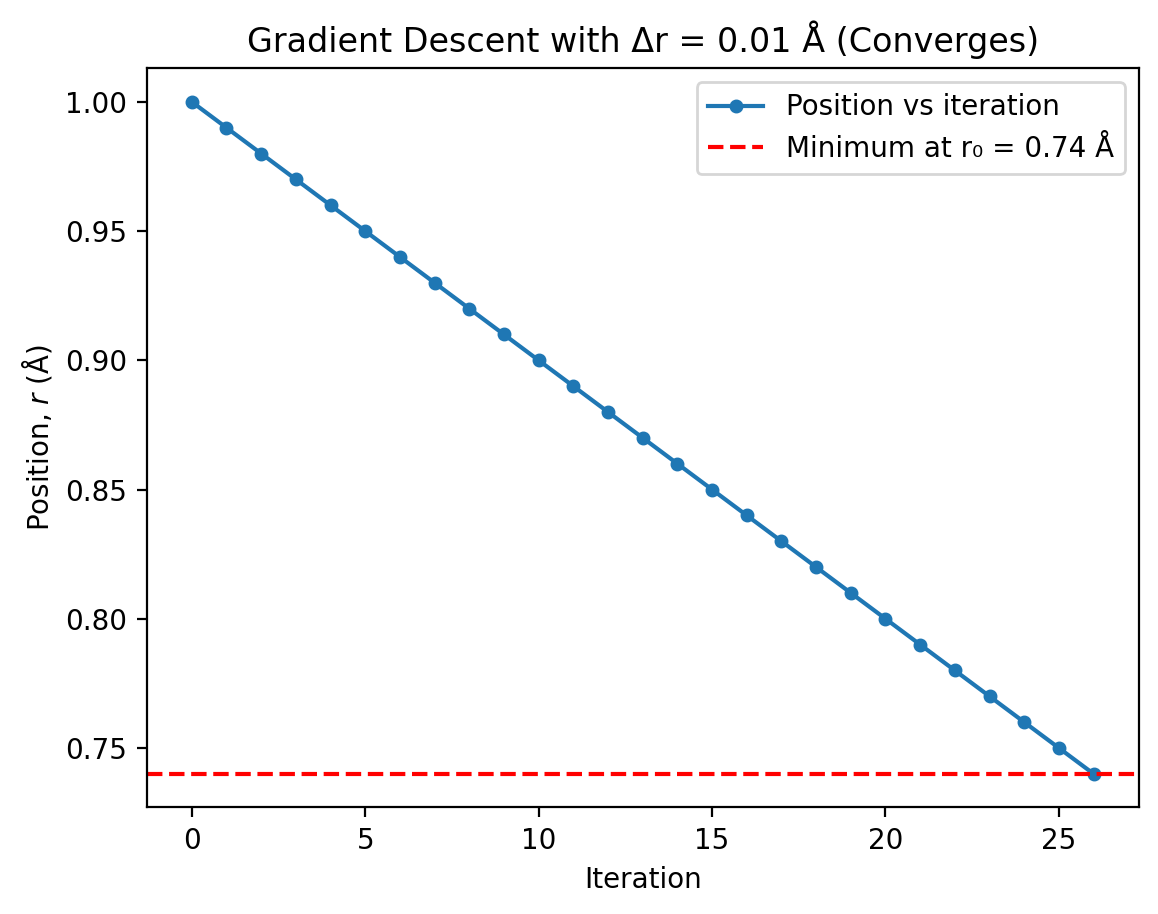

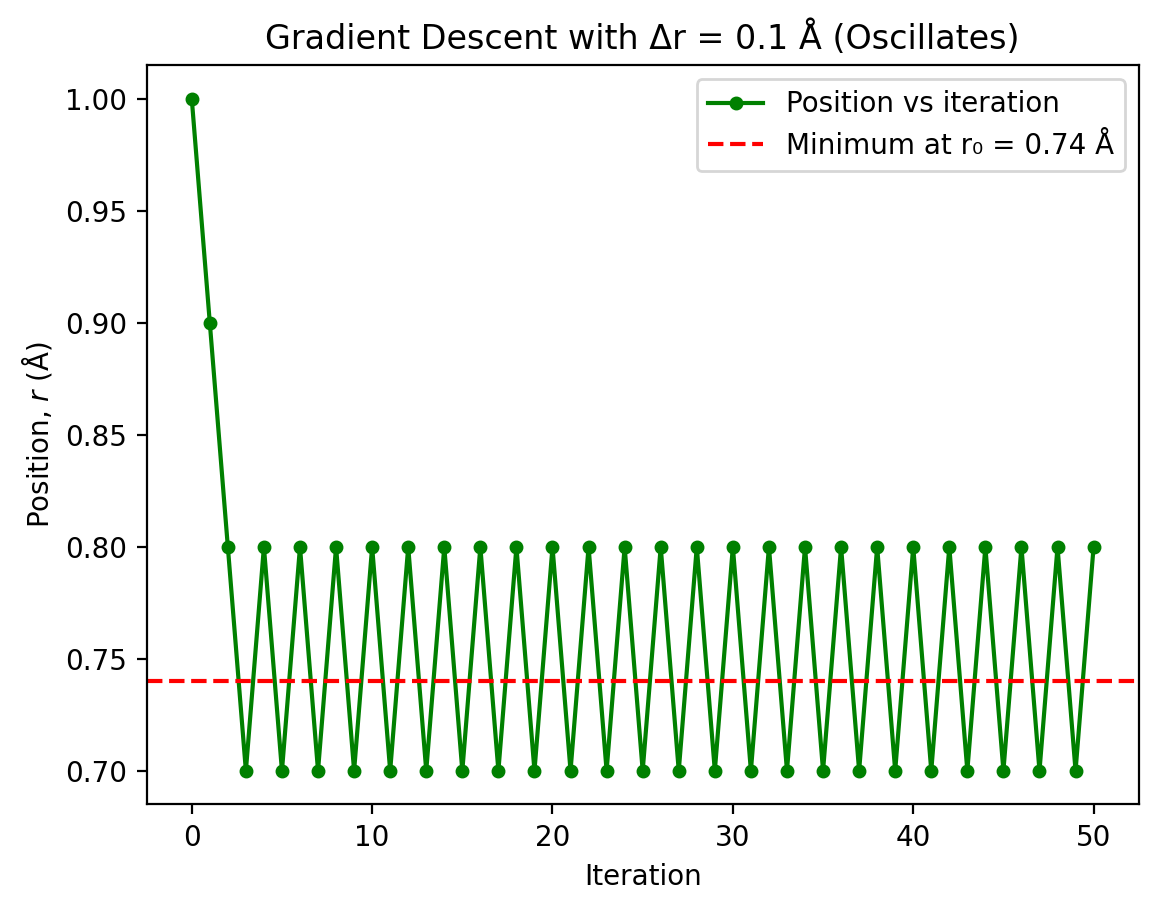

In [18]:
# First, recreate the successful run with small step size for plotting
r_current = 1.0
r_history_small = [r_current]
delta_r_small = 0.01

for iteration in range(26):
    gradient = harmonic_gradient(r_current, k, r_0)
    if abs(gradient) < 0.001:
        break
    r_current = r_current - delta_r_small * np.sign(gradient)
    r_history_small.append(r_current)

# Plot the small step size (converges)
plt.plot(r_history_small, 'o-', markersize=4, linewidth=1.5, label='Position vs iteration')
plt.axhline(r_0, color='r', linestyle='--', label=f'Minimum at r₀ = {r_0} Å')
plt.xlabel('Iteration')
plt.ylabel('Position, $r$ (Å)')
plt.title(f'Gradient Descent with Δr = 0.01 Å (Converges)')
plt.legend()
plt.show()

# Plot the large step size (oscillates)
plt.plot(r_history_large, 'go-', markersize=4, 
         label='Position vs iteration')
plt.axhline(r_0, color='r', linestyle='--', label=f'Minimum at r₀ = {r_0} Å')
plt.xlabel('Iteration')
plt.ylabel('Position, $r$ (Å)')
plt.title(f'Gradient Descent with Δr = 0.1 Å (Oscillates)')
plt.legend()
plt.show()

---

## Exercise: Adaptive Step Size Gradient Descent

The fixed step size method showed us that choosing an appropriate step size is crucial but difficult. An adaptive approach rescales the step size based on the local gradient magnitude:

$$r_{i+1} = r_i - \alpha U'(r_i)$$

where $\alpha$ is the **learning rate** parameter. This approach naturally takes smaller steps near the minimum (where the gradient is small) and larger steps far from the minimum (where the gradient is large).

### Part 1: Learning rate α = 0.01

Let's implement adaptive step size gradient descent:

In [25]:
def gradient_descent_adaptive(r_start, alpha, k, r_0, max_iterations=50, threshold=0.001):
    """Perform adaptive step size gradient descent.
    
    Args:
        r_start (float): Starting position (Å).
        alpha (float): Learning rate.
        k (float): Force constant (eV Å⁻²).
        r_0 (float): Equilibrium bond length (Å).
        max_iterations (int): Maximum number of iterations.
        threshold (float): Convergence threshold for |gradient|.
    
    Returns:
        tuple: (r_history, gradient_history, converged, num_iterations).
    """
    r_current = r_start
    r_history = [r_current]
    gradient_history = []
    
    print(f"\nAdaptive gradient descent with α = {alpha}\n")
    print("Iteration | Position (Å) | Gradient (eV Å⁻¹) |     Δr (Å)")
    print("-" * 65)
    
    converged = False
    for iteration in range(max_iterations):
        # Calculate gradient
        gradient = harmonic_gradient(r_current, k, r_0)
        gradient_history.append(gradient)
        
        # Calculate step size (adaptive)
        step = -alpha * gradient
        
        print(f"{iteration:9d} | {r_current:12.6f} | {gradient:17.6f} | {step:9.6f}")
        
        # Check convergence
        if abs(gradient) < threshold:
            print(f"\nConverged after {iteration} iterations!")
            print(f"Final position: r = {r_current:.6f} Å")
            print(f"Analytical solution: r_0 = {r_0} Å")
            print(f"Error: {abs(r_current - r_0):.6f} Å")
            converged = True
            break
        
        # Update position
        r_current = r_current + step
        r_history.append(r_current)
    
    if not converged:
        print(f"\nDid not converge within {max_iterations} iterations.")
    
    return r_history, gradient_history, converged, iteration

# Run with α = 0.01
r_history_01, grad_history_01, converged_01, iters_01 = gradient_descent_adaptive(
    1.0, 0.01, k, r_0
)


Adaptive gradient descent with α = 0.01

Iteration | Position (Å) | Gradient (eV Å⁻¹) |     Δr (Å)
-----------------------------------------------------------------
        0 |     1.000000 |          9.360000 | -0.093600
        1 |     0.906400 |          5.990400 | -0.059904
        2 |     0.846496 |          3.833856 | -0.038339
        3 |     0.808157 |          2.453668 | -0.024537
        4 |     0.783621 |          1.570347 | -0.015703
        5 |     0.767917 |          1.005022 | -0.010050
        6 |     0.757867 |          0.643214 | -0.006432
        7 |     0.751435 |          0.411657 | -0.004117
        8 |     0.747318 |          0.263461 | -0.002635
        9 |     0.744684 |          0.168615 | -0.001686
       10 |     0.742998 |          0.107913 | -0.001079
       11 |     0.741918 |          0.069065 | -0.000691
       12 |     0.741228 |          0.044201 | -0.000442
       13 |     0.740786 |          0.028289 | -0.000283
       14 |     0.740503 |          

**Explanation:**

With $\alpha = 0.01$, the algorithm converges successfully. Let's examine how the adaptive step sizes work:

Key observations:

1. **Adaptive step sizes**: Notice how the "Δr (Å)" column changes:
   - **Early iterations**: When far from the minimum, the gradient is large (e.g., 9.36 eV Å<sup>−1</sup> initially), so steps are large (−0.0936 Å)
   - **Later iterations**: As we approach the minimum, the gradient decreases, and steps become progressively smaller
   - **Near convergence**: Steps become very small as the gradient approaches zero

2. **Natural damping**: The step size automatically decreases as we approach the minimum because the gradient magnitude decreases. This prevents oscillation.

3. **Efficiency**: The adaptive method allows large initial steps when far from the minimum, then automatically refines with smaller steps near convergence, without needing to manually tune the step size.

4. **Why it works**: For the harmonic potential, $U'(r) = k(r - r_0)$, so the gradient is directly proportional to the distance from the minimum. The adaptive step size therefore automatically scales with this distance.

### Part 2: Learning rate α = 0.001

What happens with a smaller learning rate?

In [26]:
# Run with α = 0.001 (smaller)
r_history_001, grad_history_001, converged_001, iters_001 = gradient_descent_adaptive(
    1.0, 0.001, k, r_0
)


Adaptive gradient descent with α = 0.001

Iteration | Position (Å) | Gradient (eV Å⁻¹) |     Δr (Å)
-----------------------------------------------------------------
        0 |     1.000000 |          9.360000 | -0.009360
        1 |     0.990640 |          9.023040 | -0.009023
        2 |     0.981617 |          8.698211 | -0.008698
        3 |     0.972919 |          8.385075 | -0.008385
        4 |     0.964534 |          8.083212 | -0.008083
        5 |     0.956450 |          7.792217 | -0.007792
        6 |     0.948658 |          7.511697 | -0.007512
        7 |     0.941147 |          7.241276 | -0.007241
        8 |     0.933905 |          6.980590 | -0.006981
        9 |     0.926925 |          6.729289 | -0.006729
       10 |     0.920195 |          6.487034 | -0.006487
       11 |     0.913708 |          6.253501 | -0.006254
       12 |     0.907455 |          6.028375 | -0.006028
       13 |     0.901426 |          5.811353 | -0.005811
       14 |     0.895615 |         

**Explanation:**

With $\alpha = 0.001$, the algorithm **does not converge** within 50 iterations. After 49 iterations, the gradient is still 1.55 eV Å⁻¹, well above the convergence threshold of 0.001 eV Å⁻¹.

The problem:

1. **Too conservative**: With such a small learning rate, each step is very cautious:
   - **Iteration 0**: Step is only −0.00936 Å (compared to −0.0936 Å with $\alpha = 0.01$)
   - After 49 iterations, we've only reached $r = 0.783$ Å, still 0.043 Å away from the minimum at $r_0 = 0.74$ Å

2. **Progress is too slow**: The gradient decreases very gradually from 9.36 eV Å⁻¹ to 1.55 eV Å⁻¹, but we're making progress at such a slow rate that we can't reach convergence.

3. **Many more iterations needed**: To converge with this learning rate would require several hundred iterations.

**The learning rate is too small**: Whilst smaller learning rates are more stable (less likely to diverge), if they're too small, convergence becomes impractically slow. This learning rate of 0.001 is simply too conservative for efficient optimisation.

### Part 3: Learning rate α = 0.1

What happens with a larger learning rate?

In [27]:
# Run with α = 0.1 (larger)
r_history_1, grad_history_1, converged_1, iters_1 = gradient_descent_adaptive(
    1.0, 0.1, k, r_0, max_iterations=50
)


Adaptive gradient descent with α = 0.1

Iteration | Position (Å) | Gradient (eV Å⁻¹) |     Δr (Å)
-----------------------------------------------------------------
        0 |     1.000000 |          9.360000 | -0.936000
        1 |     0.064000 |        -24.336000 |  2.433600
        2 |     2.497600 |         63.273600 | -6.327360
        3 |    -3.829760 |       -164.511360 | 16.451136
        4 |    12.621376 |        427.729536 | -42.772954
        5 |   -30.151578 |      -1112.096794 | 111.209679
        6 |    81.058102 |       2891.451663 | -289.145166
        7 |  -208.087065 |      -7517.774325 | 751.777432
        8 |   543.690368 |      19546.213244 | -1954.621324
        9 | -1410.930957 |     -50820.154435 | 5082.015444
       10 |  3671.084487 |     132132.401532 | -13213.240153
       11 | -9542.155666 |    -343544.243982 | 34354.424398
       12 | 24812.268732 |     893215.034353 | -89321.503435
       13 | -64509.234703 |   -2322359.089319 | 232235.908932
       14 |

**Explanation:**

With $\alpha = 0.1$, the algorithm **diverges**! The position oscillates with increasing amplitude and never converges.

Why this happens:

1. **Overcorrection**: The first step is:
   $$\Delta r_0 = -\alpha U'(r_0) = -0.1 \times 9.36 = -0.936 \text{ Å}$$
   This moves from $r = 1.0$ Å to $r = 0.064$ Å, overshooting the minimum at $r_0 = 0.74$ Å by a large margin.

2. **Growing oscillations**: Each subsequent step overshoots even more dramatically:
   - The gradient on the far side of the minimum has opposite sign and large magnitude
   - The large $\alpha$ amplifies this, causing increasingly wild swings
   - The position alternates sides but moves further from the minimum each time

3. **Instability criterion**: For the harmonic potential with $U'(r) = k(r - r_0)$, the algorithm is stable when:
   $$\alpha < \frac{2}{k}$$
   For our case with $k = 36.0$ eV Å⁻²:
   $$\alpha < \frac{2}{36} \approx 0.056$$
   Our $\alpha = 0.1$ exceeds this threshold, causing divergence.

This demonstrates that whilst adaptive step sizes help, the learning rate parameter must still be chosen carefully. Too small and convergence is slow; too large and the algorithm diverges.

### Summary: Choosing the learning rate

1. **Adaptive vs. fixed**: Adaptive step sizes ($r_{i+1} = r_i - \alpha U'(r_i)$) can outperform fixed step sizes because they automatically adjust based on proximity to the minimum.

2. **The learning rate determines convergence speed**: There's a "sweet spot" for $\alpha$:
   - Too small: stable but slow
   - Just right: fast convergence
   - Too large: divergence

3. **Problem-specific tuning**: The optimal $\alpha$ depends on the problem (specifically, the curvature $k$ for harmonic potentials). For different force constants, different learning rates would be optimal.
